In [108]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [109]:
columns_about_complexity = [
    "voc_simpson_index",
    "voc_shannon_entropy",
    "lex_avg_dependency_link_length",
    "voc_type_token_ratio",
    "voc_hapax_legomena",
]

In [110]:
def is_in_importants(column):
    for important_column in columns_about_complexity:
        if column.endswith(important_column):
            return True
    return False

In [111]:
column_prefixes = ["^PC", "^similarity_", "^PC", "^mean_"]
file_postfixes = [
    "_pca_similarity.csv",
    "_clean_similarities.csv",
    "_pca_mean.csv",
    "_clean_similarities.csv",
]

data_sources = ["papers", "reddit", "news"]
data_sources_prefixes = ["cl_cv_papers", "reddit", "news"]

In [122]:
data_source_index = 2

similarity_or_mean_pca_or_not = 0

similarity_or_mean_pca_or_not_str_dict = {
    0: "PCA on similarity",
    1: "All similarities",
    2: "PCA on mean",
    3: "All means",
}

In [123]:
data_source = data_sources[data_source_index]
data_source_prefix = data_sources_prefixes[data_source_index]

column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

In [124]:
df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
results_df = pd.read_csv(
    os.path.join(
        data_source,
        "significant_results_" + column_prefix + data_source_prefix + file_postfix,
    )
)

In [125]:
# important_columns = results_df[results_df["term"].isin(["POST", "ONSET"])][
#     ["PC", "term", "statistic"]
# ]
# important_columns

important_columns = results_df[results_df["term"].isin(["POST"])][
    ["PC", "term", "statistic"]
]
important_columns

,PC,term,statistic
2,PC1,POST,8.376562
4,PC6,POST,3.431591
5,PC9,POST,-2.582042
6,PC10,POST,2.448289
7,PC11,POST,2.212112


In [ ]:
# for each of the rows in the important columns, using the column, PC, plot that column in the df with respect to the date which can be constructed from the year and month that is in df. Also for each of the plots, highlight the axvline at the date of the introduction of the chatgpt which is on November 2022. do the plots using plotly express

for index, row in important_columns.iterrows():
    column = row["PC"]
    term = row["term"]
    statistic = row["statistic"]
    trend = "higher" if statistic > 0 else "lower"
    type_of_trend = "shock" if term == "ONSET" else "lasting"
    df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str))

    # make the df column with respect to date a bit more smooth using window average
    if similarity_or_mean_pca_or_not == 1:
        df[column] = np.sqrt(df[column])
    df[column] = df[column].rolling(window=5).mean()

    px.line(
        df,
        x="date",
        y=column,
        title=f"{column} vs Date showing a {type_of_trend} {trend} trend (Source: {data_source}) features being {similarity_or_mean_pca_or_not_str_dict[similarity_or_mean_pca_or_not]}",
        labels={"date": "Date", column: f"PC {column}"},
    ).add_vline(
        x="2022-11-01",
        line_dash="dash",
        line_color="red",
    ).add_vline(
        x="2023-03-14",
        line_dash="dash",
        line_color="blue",
    ).add_annotation(
        x="2022-11-01",
        y=-0.1,
        text="ChatGPT Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    ).add_annotation(
        x="2023-03-14",
        y=-0.2,
        text="GPT-4 Release",
        showarrow=False,
        xanchor="center",
        yanchor="top",
        yref="paper",
    ).show()

    plt.show()
    plt.close()

In [75]:
for data_source_index in range(3):

    similarity_or_mean_pca_or_not = 1

    data_source = data_sources[data_source_index]
    data_source_prefix = data_sources_prefixes[data_source_index]

    column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
    file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

    df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
    results_df = pd.read_csv(
        os.path.join(
            data_source,
            "significant_results_" + column_prefix + data_source_prefix + file_postfix,
        )
    )

    important_columns = results_df[results_df["term"].isin(["POST"])][
        ["PC", "term", "statistic"]
    ]

    for index, row in important_columns.iterrows():
        column = row["PC"]

        if not is_in_importants(column):
            continue
        term = row["term"]
        statistic = row["statistic"]
        trend = "higher" if statistic > 0 else "lower"
        type_of_trend = "shock" if term == "ONSET" else "lasting"
        df["date"] = pd.to_datetime(
            df["year"].astype(str) + "-" + df["month"].astype(str)
        )

        # make the df column with respect to date a bit more smooth using window average
        if similarity_or_mean_pca_or_not in [0, 1]:
            df[column] = np.sqrt(df[column])
        df[column] = df[column].rolling(window=5).mean()

        px.line(
            df,
            x="date",
            y=column,
            title=f"{column} vs Date showing a {type_of_trend} {trend} trend (Source: {data_source}) features being {similarity_or_mean_pca_or_not_str_dict[similarity_or_mean_pca_or_not]}",
            labels={"date": "Date", column: f"PC {column}"},
        ).add_vline(
            x="2022-11-01",
            line_dash="dash",
            line_color="red",
        ).add_vline(
            x="2023-03-14",
            line_dash="dash",
            line_color="blue",
        ).add_annotation(
            x="2022-11-01",
            y=-0.1,
            text="ChatGPT Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).add_annotation(
            x="2023-03-14",
            y=-0.2,
            text="GPT-4 Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).show()

        plt.show()
        plt.close()

In [127]:
for data_source_index in range(3):

    similarity_or_mean_pca_or_not = 1

    data_source = data_sources[data_source_index]
    data_source_prefix = data_sources_prefixes[data_source_index]

    column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
    file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

    df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
    results_df = pd.read_csv(
        os.path.join(
            data_source,
            "significant_results_" + column_prefix + data_source_prefix + file_postfix,
        )
    )

    for column in df.columns:
        if not is_in_importants(column):
            continue

        df["date"] = pd.to_datetime(
            df["year"].astype(str) + "-" + df["month"].astype(str)
        )

        # make the df column with respect to date a bit more smooth using window average
        if similarity_or_mean_pca_or_not in [0, 1]:
            df[column] = np.sqrt(df[column])
        df[column] = df[column].rolling(window=5).mean()

        px.line(
            df,
            x="date",
            y=column,
            title=f"{column} vs Date (Source: {data_source})",
            labels={"date": "Date", column: f"PC {column}"},
        ).add_vline(
            x="2022-11-01",
            line_dash="dash",
            line_color="red",
        ).add_vline(
            x="2023-03-14",
            line_dash="dash",
            line_color="blue",
        ).add_annotation(
            x="2022-11-01",
            y=-0.1,
            text="ChatGPT Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).add_annotation(
            x="2023-03-14",
            y=-0.2,
            text="GPT-4 Release",
            showarrow=False,
            xanchor="center",
            yanchor="top",
            yref="paper",
        ).show()

        plt.show()
        plt.close()

In [42]:
final_results_data_sources = []
final_results_features = []
final_results_trends = []


for data_source_index in range(3):

    similarity_or_mean_pca_or_not = 1

    data_source = data_sources[data_source_index]
    data_source_prefix = data_sources_prefixes[data_source_index]

    column_prefix = column_prefixes[similarity_or_mean_pca_or_not]
    file_postfix = file_postfixes[similarity_or_mean_pca_or_not]

    df = pd.read_csv(os.path.join(data_source, data_source_prefix + file_postfix))
    results_df = pd.read_csv(
        os.path.join(
            data_source,
            "significant_results_" + column_prefix + data_source_prefix + file_postfix,
        )
    )

    important_columns = results_df[results_df["term"].isin(["POST"])][
        ["PC", "term", "statistic"]
    ]

    for index, row in important_columns.iterrows():
        column = row["PC"]
        term = row["term"]
        statistic = row["statistic"]
        trend = "higher" if statistic > 0 else "lower"
        type_of_trend = "shock" if term == "ONSET" else "lasting"

        final_results_data_sources.append(data_source)
        final_results_features.append(column)
        final_results_trends.append(trend)

In [43]:
final_results_df = pd.DataFrame(
    {
        "Data Source": final_results_data_sources,
        "Feature": final_results_features,
        "Trend": final_results_trends,
    }
)

In [44]:
# drop the similarity_ from the feature column
final_results_df["Feature"] = final_results_df["Feature"].str.replace("similarity_", "")

In [45]:
def assign_category(feature):

    if (
        "_functional_word_" in feature
        or "lex_punctuation" in feature
        or "lex_functional_words_count" in feature
        or "lex_special_char_count" in feature
    ):
        return "Functional"
    elif "_pos_" in feature:
        return "POS"
    elif "_ner_" in feature:
        return "NER"
    elif "voc_" in feature or feature == "lex_lexical_density":
        return "Vocabulary"
    elif "liwc" in feature:
        return "LIWC"
    elif "_dep_" in feature or "dependency" in feature:
        return "Dependency"
    elif "_length_" in feature:
        return "Length"

    else:
        return "None"

In [46]:
final_results_df["Category"] = final_results_df["Feature"].apply(assign_category)

In [47]:
final_results_df[final_results_df["Category"] == "None"]

,Data Source,Feature,Trend,Category


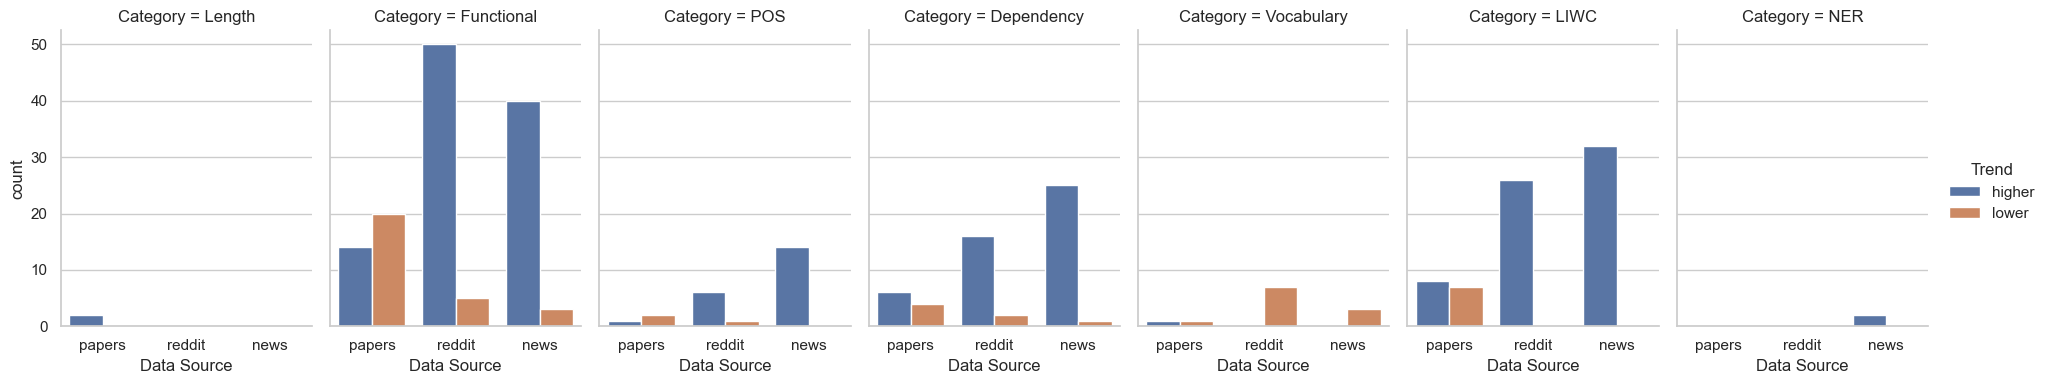

In [48]:
## draw a bar plot, one for each data source, showing the number of features with higher and lower trends

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=final_results_df,
    x="Data Source",
    hue="Trend",
    kind="count",
    col="Category",
    height=4,
    aspect=0.7,
)

In [49]:
# make a piechart showing the distribution of the features that have same trend in all data sources

features_names = []
features_num_trends = []
features_num_sources = []

for feature in final_results_df["Feature"].unique():
    trends = final_results_df[final_results_df["Feature"] == feature]
    num_trends = trends["Trend"].nunique()
    num_sources = trends["Data Source"].nunique()
    features_names.append(feature)
    features_num_trends.append(num_trends)
    features_num_sources.append(num_sources)

features_trends_df = pd.DataFrame(
    {
        "Feature": features_names,
        "Num Trends": features_num_trends,
        "Num Sources": features_num_sources,
    }
)

In [50]:
features_trends_df

,Feature,Num Trends,Num Sources
0,lex_avg_sent_length_by_char,1,1
1,lex_avg_sent_length_by_word,1,1
2,lex_functional_words_count,2,3
3,lex_functional_word_between,2,2
4,lex_functional_word_in,1,3
...,...,...,...
195,liwc_sad,1,1
196,liwc_inhib,1,1
197,liwc_hear,1,1
198,liwc_motion,1,1


In [51]:
# make a sunburst chart showing the distribution of different variations of the Num Trends and Num Sources
# with sub-pies showing the distribution of Num Sources for each Num Trends value

# change the Num Trends Values and Num Sources values to say that for instance 1 Trend or 2 Trends instead of 1 or 2
features_trends_df["Num Trends Names"] = features_trends_df["Num Trends"].apply(
    lambda x: f"{x} Trend" if x == 1 else f"{x} Trends"
)
features_trends_df["Num Sources Names"] = features_trends_df["Num Sources"].apply(
    lambda x: f"{x} Source" if x == 1 else f"{x} Sources"
)


fig = px.sunburst(
    features_trends_df,
    path=["Num Trends Names", "Num Sources Names"],
    values="Num Sources",
    title="Distribution of Features based on the Number of Trends and Number of Sources",
    hover_data=["Feature"],  # Show feature names on hover,
    labels={
        "Num Trends": "Number of Trends",
        "Num Sources": "Number of Sources",
    },  # More readable labels
)


# Update the layout for better readability
fig.update_layout(
    width=800,
    height=800,
)

fig.show()